# Test 1 - Noise analysis

In [9]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [10]:
# Import traces data
project_dir = os.getenv("MASTER_THESIS_RESULTS")
noise_dir = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/Noise/data")
noise_traces_file_path = os.path.join(noise_dir, "traces.npy")
noise_traces_npy = np.load(noise_traces_file_path)
noise_traces_df = pd.DataFrame(noise_traces_npy)
noise_traces_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000699,0.000707,0.000697,0.000728,0.000733,0.000695,0.000689,0.000692,0.000705,0.000696,...,0.000664,0.000690,0.000670,0.000682,0.000678,0.000674,0.000675,0.000667,0.000667,0.000665
std,0.000358,0.000361,0.000361,0.000372,0.000370,0.000356,0.000353,0.000353,0.000361,0.000358,...,0.000348,0.000355,0.000342,0.000353,0.000354,0.000352,0.000339,0.000348,0.000355,0.000358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031
25%,0.000432,0.000437,0.000432,0.000454,0.000458,0.000425,0.000425,0.000432,0.000428,0.000432,...,0.000401,0.000432,0.000411,0.000409,0.000411,0.000415,0.000427,0.000407,0.000407,0.000401
50%,0.000660,0.000671,0.000655,0.000686,0.000705,0.000657,0.000659,0.000652,0.000672,0.000656,...,0.000629,0.000649,0.000635,0.000644,0.000642,0.000637,0.000642,0.000629,0.000629,0.000618
75%,0.000928,0.000930,0.000918,0.000965,0.000970,0.000923,0.000910,0.000915,0.000930,0.000916,...,0.000874,0.000918,0.000886,0.000907,0.000902,0.000891,0.000889,0.000886,0.000890,0.000881
max,0.002497,0.003089,0.003247,0.003412,0.002534,0.002460,0.004364,0.004126,0.003665,0.003559,...,0.004696,0.005650,0.003091,0.002970,0.003095,0.003035,0.003941,0.004573,0.006293,0.007116


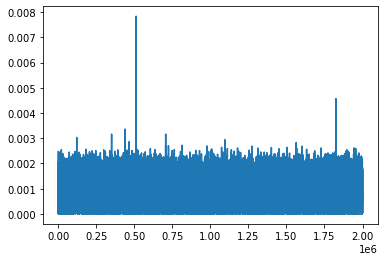

In [11]:
%matplotlib inline
# Flatten the traces
noise_traces_flattened = noise_traces_npy.flatten()
df_noise_flatten = pd.DataFrame(noise_traces_flattened)
plt.plot(noise_traces_flattened)
plt.show()

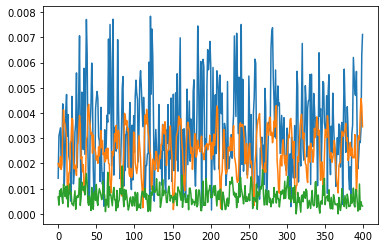

In [13]:
%matplotlib inline
index_1 = int(512400 / 400)
index_2 = int(1824800 / 400)
plt.plot(noise_traces_npy[index_1])
plt.plot(noise_traces_npy[index_2])
plt.plot(noise_traces_npy[index_2-20])
plt.show()

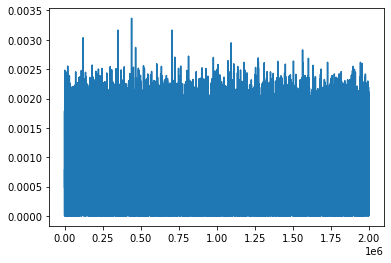

In [14]:
%matplotlib inline
traces_fixed = noise_traces_npy.copy()
traces_fixed[index_1] = traces_fixed[index_1 -20]
traces_fixed[index_2] = traces_fixed[index_2 -20]
noise_traces_flattened_fixed = traces_fixed.flatten()
#noise_traces_flattened_fixed[index_1] = noise_traces_flattened_fixed[index_1-30]
plt.plot(noise_traces_flattened_fixed)
plt.show()

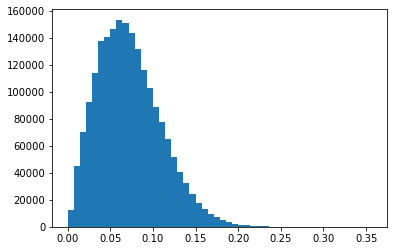

In [18]:
%matplotlib inline
plt.hist(noise_traces_flattened_fixed*106, bins=50)
plt.show()

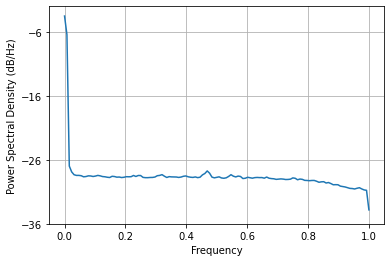

In [19]:
%matplotlib inline
plt.psd(noise_traces_flattened_fixed*106)
plt.show()

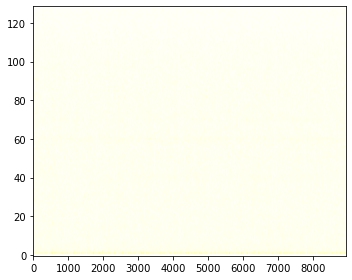

In [20]:
freqs, times, spectrogram = signal.spectrogram(noise_traces_flattened_fixed*106)

plt.figure(figsize=(5,4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.tight_layout()

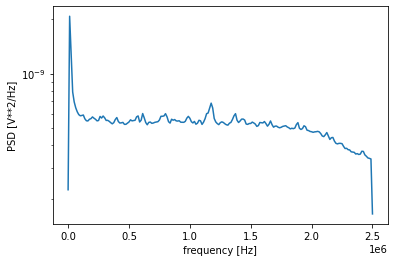

In [21]:
fs = 5e6
f, Pxx_den = signal.welch(noise_traces_flattened_fixed*106, fs, nperseg=400, average="mean")
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [23]:
from scipy.fftpack import fft, irfft, rfft, fftfreq
fft_noise_traces = rfft(noise_traces_flattened_fixed)
fft_noise_trces_x = fftfreq(len(noise_traces_flattened_fixed))
fft_noise_traces_rev = irfft(fft_noise_traces)


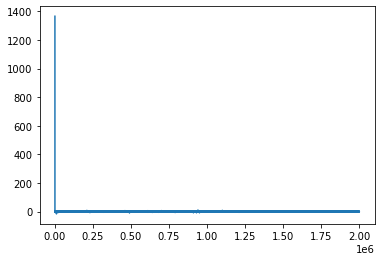

In [24]:
plt.plot(fft_noise_traces)
plt.show()

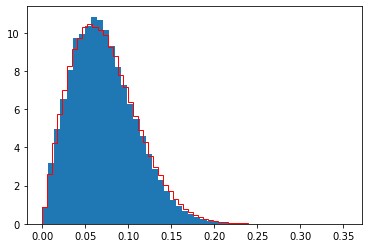

In [28]:
rayleigh_noise_set = []
for i in range(2000):
    rayleigh_noise = np.random.rayleigh(0.058,110)
    rayleigh_noise_set.append(rayleigh_noise)

rn = np.array(rayleigh_noise_set)
plt.hist(noise_traces_flattened_fixed*105, bins=50, density=True, histtype="stepfilled")
plt.hist(rn.flatten(), bins=50, density=True, histtype="step", color="r", rwidth=4)
plt.show()

In [38]:
MASTERTHESISTOP = os.getenv("MASTERTHESISTOP")
PATH = "datasets/last_round_aes/experiment_axel/1029_trace_noise_office/original_data/"
FILE = "all__1000.npy"
file_path = os.path.join(MASTERTHESISTOP, PATH, FILE)
original_noise_trace = np.load(file_path)
original_noise_trace.flatten().mean()

0.00068198366

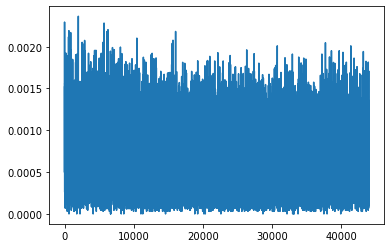

In [39]:
plt.plot(original_noise_trace.flatten())
plt.show()

# Find the scalar for 15m device 6

In [35]:
DEVICE = 10
PATH = f"datasets/last_round_aes/testing_data/testing_trace_15m/d{DEVICE}_5k/original_data/"
FILE = "all__3000.npy"
traces = os.path.join(MASTERTHESISTOP, PATH, FILE)
print(traces)
averaging = 1

#trace_select = np.random.sample(len(trace))
#print(trace_select)
scalars = []
translations = []
for trace in traces:
    MAX = np.max(trace)
    MIN = np.min(trace)
    #nor_one_trace_maxmin = (one_trace-MIN)/(MAX-MIN)
    scalar = 1/(MAX-MIN)
    translation = -MIN
    scalars.append(scalar)
    translations.append(translation)

scalars = np.array(scalars)
translations = np.array(translations)
print(f"Avg Scalar: {scalars.mean()}, Avg Translation: {translations.mean()}")
#nor_trace_maxmin.append(nor_one_trace_maxmin)
print(translations.size)

plt.plot(traces[0])
plt.show()

/Users/xeezy/Documents/MASTER-THESIS/datasets/last_round_aes/testing_data/testing_trace_15m/d10_5k/original_data/all__3000.npy


TypeError: cannot perform reduce with flexible type

# GWN 0.04 Hidden layer - Epochs

In [7]:
USER = os.getenv("USER")
PATH = f"/Users/{USER}/Documents/MASTER-THESIS/datasets/last_round_aes/testing_data/testing_script/epoch_analysis_GWN_0_04_hidden_layer/"
i = 30
df = pd.DataFrame()
for FILE in os.listdir(PATH):
    df[f"{i}"] = np.load(PATH + FILE)
    i+=5

df.describe()

,30,35,40,45,50,55,60,65,70,75,80,85,90,95
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,626.800000,509.350000,421.200000,390.750000,363.350000,381.050000,376.800000,376.15000,381.70000,411.500000,422.950000,377.100000,462.700000,482.350000
std,78.320932,57.509976,51.407147,47.092155,39.196234,52.341465,39.604093,45.77781,52.08202,49.669963,52.066228,48.409329,43.923498,73.288381
min,490.000000,388.000000,337.000000,332.000000,284.000000,324.000000,306.000000,259.00000,300.00000,299.000000,342.000000,288.000000,385.000000,308.000000
25%,565.500000,467.000000,386.750000,356.000000,336.000000,340.500000,354.500000,357.50000,335.25000,383.750000,377.750000,341.000000,427.750000,438.000000
50%,624.500000,528.500000,415.500000,381.500000,372.000000,371.500000,384.500000,381.00000,381.50000,416.500000,425.000000,384.000000,469.000000,494.000000
75%,673.500000,549.500000,458.250000,416.500000,383.750000,395.500000,395.750000,402.75000,406.25000,435.250000,466.500000,410.500000,492.250000,534.000000
max,799.000000,585.000000,529.000000,506.000000,428.000000,514.000000,470.000000,466.00000,512.00000,500.000000,512.000000,456.000000,542.000000,634.000000


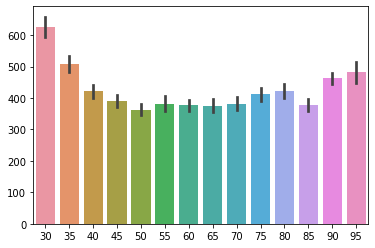

In [8]:
ax = sns.barplot(data=df)

In [ ]:
USER = os.getenv("USER")
PATH = f"/Users/{USER}/Documents/MASTER-THESIS/datasets/last_round_aes/testing_data/testing_script/epoch_analysis_rayleigh_noise_0138/"
i = 40
df = pd.DataFrame()
FILES = os.listdir(PATH)
for FILE in FILES[1:]:
    print(FILE)
    df[f"{i}"] = np.load(PATH + FILE)
    i+=5

df[f"{100}"] = np.load(PATH + FILES[0])
df.describe()

rank_test-device-6-epoch-40-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-45-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-50-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-55-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-60-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-65-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-70-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-75-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-80-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-85-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-90-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0138.npy
rank_test-device-6-epoch-95-keybyte-0-runs20-axel_cnn_110_rayleigh_noise_0_0

,40,45,50,55,60,65,70,75,80,85,90,95,100
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,454.950000,432.350000,435.600000,460.300000,448.150000,452.55000,459.300000,477.400000,486.750000,474.700000,449.25000,477.500000,478.300000
std,52.949305,65.018439,57.326764,54.782921,62.566407,67.65351,49.806045,69.131758,63.661006,44.885937,50.64414,67.244644,59.913183
min,355.000000,327.000000,347.000000,368.000000,359.000000,340.00000,355.000000,378.000000,405.000000,402.000000,394.00000,348.000000,359.000000
25%,418.500000,383.750000,389.000000,428.000000,401.250000,391.00000,434.750000,430.500000,426.250000,447.000000,413.00000,442.500000,432.250000
50%,448.500000,436.500000,456.500000,458.500000,438.500000,473.50000,453.000000,475.000000,491.500000,479.000000,433.00000,469.000000,486.000000
75%,494.000000,477.500000,478.500000,492.500000,499.250000,501.75000,490.500000,517.000000,536.500000,496.500000,469.25000,507.750000,510.750000
max,553.000000,543.000000,520.000000,590.000000,564.000000,583.00000,563.000000,654.000000,627.000000,579.000000,583.00000,609.000000,602.000000


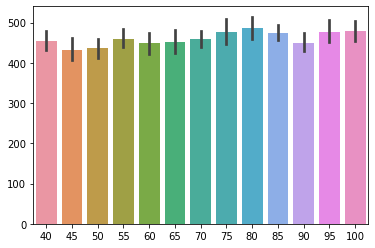

In [18]:
ax = sns.barplot(data=df)

# Collected noise x50 - Epoch

In [21]:
USER = os.getenv("USER")
PATH = f"/Users/{USER}/Documents/MASTER-THESIS/datasets/last_round_aes/testing_data/testing_script/epoch_analysis_collected_50/"
i = 50
df = pd.DataFrame()
FILES = os.listdir(PATH)
for FILE in FILES[1:]:
    print(FILE)
    df[f"{i}"] = np.load(PATH + FILE)
    i+=5

df[f"{100}"] = np.load(PATH + FILES[0])
df.describe()

rank_test-device-6-epoch-50-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-55-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-60-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-65-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-70-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-75-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-80-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-85-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scaling_no_mean_adjustment.npy
rank_test-device-6-epoch-90-keybyte-0-runs20-axel_cnn_110_model_collected_noise_50_scali

,50,55,60,65,70,75,80,85,90,95,100
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,421.500000,435.250000,433.950000,401.600000,431.750000,405.400000,407.600000,424.400000,413.100000,415.450000,432.200000
std,43.543686,48.158592,54.022875,75.394681,57.817203,49.715401,67.932939,47.266768,57.822687,58.732646,50.399039
min,363.000000,330.000000,322.000000,315.000000,353.000000,317.000000,288.000000,335.000000,326.000000,338.000000,342.000000
25%,390.000000,407.000000,411.000000,346.750000,399.250000,382.000000,356.750000,389.000000,367.750000,379.500000,410.750000
50%,414.000000,432.500000,417.000000,377.500000,427.500000,406.500000,408.000000,423.000000,417.000000,404.500000,424.000000
75%,449.000000,469.250000,460.000000,438.000000,448.750000,449.000000,462.750000,454.500000,467.250000,446.750000,462.500000
max,516.000000,514.000000,552.000000,616.000000,602.000000,480.000000,523.000000,510.000000,502.000000,586.000000,545.000000


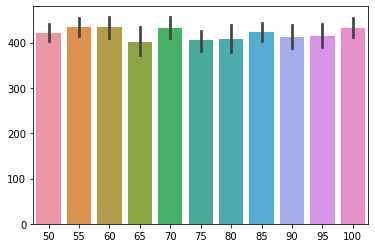

In [22]:
ax = sns.barplot(data=df)